<br>
<hr>

<div style="text-align: justify;">
<br>
<center><div><b style="font-size:21px;">Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria</b></div></center>
<center><div><b style="font-size:22px;color:#72849d">Redes Bayesianas Gaussianas aplicada à predição de vendas em uma grande rede de fast-food brasileira</b></div></center>
<br>
<div style="text-align: justify;">
Resultados apresentados ao Instituto de Ciências Matemáticas e de Computação - ICMC-USP, como parte dos requisitos para obtenção do título de mestre - Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria, sob orientação do <a href="http://conteudo.icmc.usp.br/pessoas/alneu/" target="_blank"> Prof. Dr. Alneu de Andrade Lopes</a> e Co-Orientação <a href="https://scholar.google.com/citations?user=tuOaq-4AAAAJ&hl=pt-BR" target="_blank">Dr. Brett Drury.</a>
</div>
<br>
<hr>
<center><div><b style="font-size:22px;">Previsão de Vendas - Grupo de Adicionais - SP</b></div></center>
<hr>

In [13]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pyramid.arima import auto_arima
from scipy import stats

plt.style.use('seaborn')

In [14]:
data = pd.read_excel('data/food-sp.xlsx')

In [15]:
data.columns.values

array(['UF', 'DATA', 'VENDA', 'ADICIONAL', 'BRINDE', 'MOLHO FESTIVAL',
       'CHOPP COM UNIDADE EM LITRO', 'BEBIDA COM UNIDADE EM LITRO',
       'BEX SALADAS', 'DOCE E TORTA', 'BEBIDA', 'MOLHO',
       'GELADO E MILK SHAKE', 'ITENS DE COMPOSIÇÃO', 'BEX SNACKS',
       'BEX DOCES', 'BEX SANDUICHES E MOLHOS', 'SACHET MOLHO PINCANHA',
       'BEX GELADOS E MILKSHAKES', 'BEX CAFE', 'PROJETO CAFÉ',
       'PROJETO CHOPP', 'PRATO', 'BEX BEBIDAS', 'LANCHE FRANQUEADO',
       'ACOMPANHAMENTO', 'SANDUICHE', 'LINHA ORIGINAL', 'OUTROS',
       'CALDA BOBS TOP', 'REFEICAO COLABORADORES'], dtype=object)

In [16]:
variavel = 'ADICIONAL'

In [17]:
data.index = data['DATA']

In [18]:
df_train = data.iloc[1:84,]
df_test = data.iloc[84:96,] 

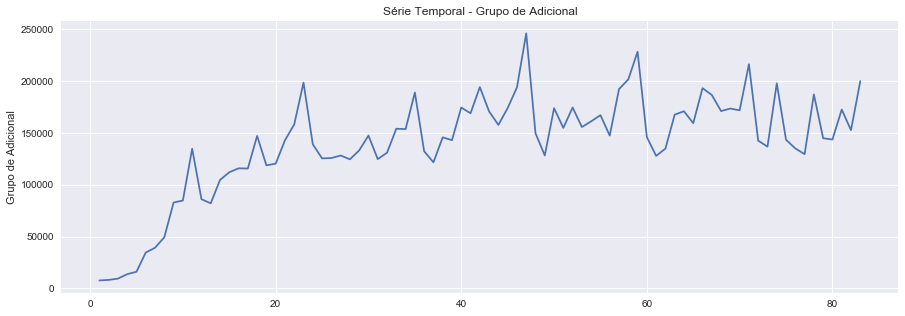

In [19]:
plt.figure(figsize=(15,5))
plt.plot(list(range(1,84)), df_train[variavel])
plt.ylabel('Grupo de '+ variavel.title())
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()

In [97]:
df_train[variavel+'_box'], lmbda = stats.boxcox(df_train[variavel])

/Users/robsonfernandes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<hr>
<center><div><b style="font-size:22px;">Desenvolvimento do Modelo</b></div></center>
<br>

In [105]:
model = auto_arima(df_train[variavel+'_box'], 
                    n_fits=12,
                    start_p=0, 
                    start_q=0, 
                    max_p=5, 
                    max_q=5, 
                    m=50,
                    start_P=0, 
                    d=1, 
                    D=1, 
                    trace=True,
                    stationary=False,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 50); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_orde

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   83
Model:             SARIMAX(2, 1, 4)x(0, 1, 0, 50)   Log Likelihood                -556.344
Date:                            Sun, 11 Mar 2018   AIC                           1128.687
Time:                                    00:25:00   BIC                           1148.038
Sample:                                         0   HQIC                          1136.461
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.35e+06   8.45e+05     -1.598      0.110   -3.01e+06    3.05e+05
ar.L1          0.0186      0.152      0.122      0.903      -0.279       0.317
ar.L2         -0.9789      0.202     -4.840      0.000      -1.375      -0.582
ma.L1         -0.5388      0.345     -1.561      0.118      -1.215       0.138
ma.L2          0.6085      0.645      0.943      0.346      -0.656       1.873
ma.L3         -0.2964      0.504     -0.588      0.557      -1.285       0.692
ma.L4         -0.4540      0.295     -1.538      0.124      -1.033       0.125
sigma2      9.727e+13   7.35e-06   1.32e+19      0.000    9.73e+13    9.73e+13
===================================================================================
Ljung-Box (Q):                       45.67   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.04   Prob(JB):                         0.42
Heteroskedasticity (H):               0.99   Skew:                            -0.36
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.55e+37. Standard errors may be unstable.
"""

In [107]:
forecast = model.predict(n_periods=12)
forecast

array([28679310.94028296, 32671273.80615083, 26467810.27093586,
       23669381.34261243, 19885489.71355639, 18051860.43213134,
       33902311.37639119, 32389343.5213404 , 30179638.72480343,
       22340993.67841956, 26461766.85617611, 30914329.45469854])

In [108]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [109]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [110]:
y_pred = invboxcox(forecast,lmbda)
y_true = df_test[variavel].values

<h1><hr>
<center><div><b style="font-size:22px;">Avaliação de Acuracidade</b></div></center>

In [111]:
acuracia = round(100 - mean_absolute_percentage_error(y_true , y_pred),0)
acuracia

80.0

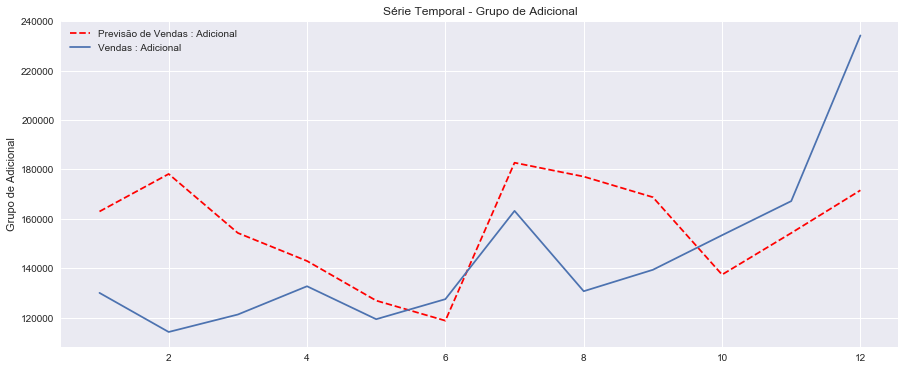

In [112]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), y_pred, '--', label='Previsão de Vendas : '+ variavel.title() ,color='r')
plt.legend()
plt.plot(list(range(1,13)), y_true, label='Vendas : '+ variavel.title())
plt.legend()
plt.ylabel('Grupo de '+ variavel.title())
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()